

# Project: Investigate the 'No-show appointments' Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Key notes**: "This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up." 

> **Questions to explore**: 
><li><a href="#q1"> 1. What is the infomation regarding the oldest patient?</a></li>
><li><a href="#q2"> 2. What is the patients number of male versus female?</a></li>
><li><a href="#q3"> 3. What is the distribution of male and female patients?</a></li>
><li><a href="#q4"> 4. On which years, months and days did most patients as well as least patients made appointments?  How many patients are there in total in the list?</a></li>
><li><a href="#q5"> 5. Hou many patients's appintments were scheduled in the April and May of 2016? What is the relationship between scheduled_day and appointment_day?</a></li>
><li><a href="#q6"> 6. Among all the 4 kinds of dieseas, which has highest morbility？</a></li>
><li><a href="#q7"> 7. What is the most frequent neighbourhood, and it is mostly associated with what age group?</a></li>
><li><a href="#q8"> 8. What is the ratio of patients suffering from different kinds of diseases, respectively?</a>
><li><a href="#q9"> 9. What is the ratio of both male and female patients suffering from different kinds of diseases, respectively?</a></li>
><li><a href="#q10"> 10. Bwtween 16: 00  and 17: 00pm, how many patients's appointments were scheduled on daily bases?</a></li>
><li><a href="#q11"> 11. What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?</a></li>



In [1]:
# Set up import statements for all of the packages that are planed to use
# Include a 'magic word' so that visualizations are plotted
# call on dataframe to display the first 5 rows

import pandas as pd
import numpy as np
import datetime
import calendar
from statistics import mode
! pip install prettytable
from prettytable import PrettyTable
% matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'
import seaborn as sns
sns.set_style('whitegrid')
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

<a id='wrangling'></a>
## Data Wrangling

> **Key notes**: In this section of the report, the following work will be done: load the data; check for cleanliness; trim and clean dataset for analysis.

### General Properties

In [2]:
# Load data and print out a few lines

df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
# return a tuple of the dimensions of the dataframe

df.shape

(110527, 14)

In [4]:
# print the column labels in the dataframe

for i, v in enumerate(df.columns):
    print(i, v)

0 PatientId
1 AppointmentID
2 Gender
3 ScheduledDay
4 AppointmentDay
5 Age
6 Neighbourhood
7 Scholarship
8 Hipertension
9 Diabetes
10 Alcoholism
11 Handcap
12 SMS_received
13 No-show


In [5]:
# return the datatypes of the columns

df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [6]:
# check for duplicates in the data

sum(df.duplicated())

0

In [7]:
#  check if any value is NaN in DataFrame and in how many columns

df.isnull().any().any(), sum(df.isnull().any())

(False, 0)

In [8]:
# displays a concise summary of the dataframe
# including the number of non-null values in each column

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [9]:
# Generates descriptive statistics, excluding NaN values

df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


### Data Cleaning 


In [10]:
# Change column name into lower case for the convenience of analysis
# Confirm changes

df.rename(columns = lambda x: x.lower(), inplace = True)
df.head()

,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [11]:
# Change some column name to avoid ambiguity
# Confirm changes

df.rename(columns = {'patientid': 'patient_id', 'appointmentid': 'appointment_id', 'scheduledday': 'scheduled_day',\
                    'appointmentday': 'appointment_day', 'handcap': 'handicap', 'hipertension': 'hypertension', \
                    'no-show': 'no_show'}, 
          inplace = True)
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
# Fix datetime format
# Confirm changes

df.iloc[:, 3:5] = df.iloc[:, 3:5].apply(pd.to_datetime, errors='coerce')
df.head()

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='eda'></a>
## Exploratory Data Analysis
<a id='q1'></a>
### Research Question 1: What is the infomation regarding the oldest patient?

In [13]:
df.loc[df['age'].idxmax()]

patient_id                 3.19632e+13
appointment_id                 5700278
gender                               F
scheduled_day      2016-05-16 09:17:44
appointment_day    2016-05-19 00:00:00
age                                115
neighbourhood               ANDORINHAS
scholarship                          0
hypertension                         0
diabetes                             0
alcoholism                           0
handicap                             1
sms_received                         0
no_show                            Yes
Name: 63912, dtype: object

> The oldest patient is a woman who is 115 yeas old and remains relatively heathy. Except for handicap, she had not been diagnosed suffering any major disease in the list. 

<a id='q2'></a>
### Research Question 2: What is the patients number of male versus female?

In [14]:
# Use groupby to find out the value count for the gender column

# Print out the respective numbers for both male and female patients

all_gender = df.groupby(['gender'])['age'].value_counts()

print('The number of male and female patiens are {} and {}, respectively.'.format(\
all_gender.loc['M'].sum(), all_gender.loc['F'].sum()))


The number of male and female patiens are 38687 and 71840, respectively.


<a id='q3'></a>
### Research Question 3: What is the distribution of male and female patients?

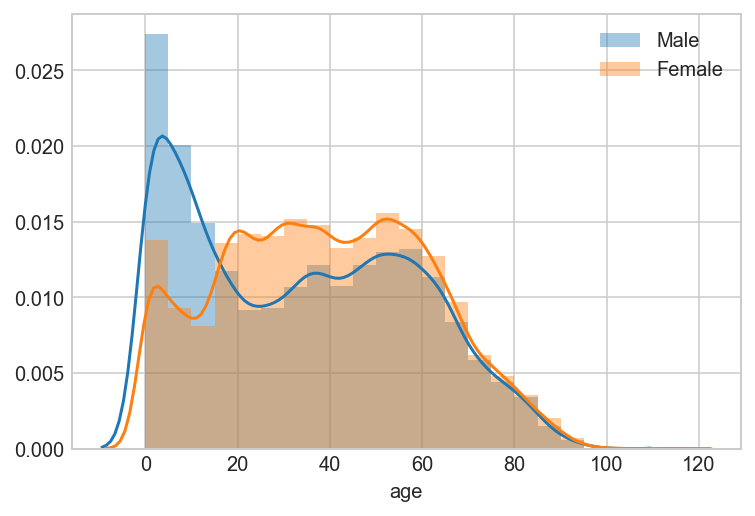

In [15]:
# Use query to seperate male and female group and plot

m_age = df.query('gender == "M"').age
f_age = df.query('gender == "F"').age


sns.distplot(m_age, bins=range(0, 100, 5),label='Male')
sns.distplot(f_age, bins=range(0, 100, 5),label='Female')
plt.legend()
plt.show()

<a id='q4'></a>
### Research Question 4: On which years, months and days did most patients as well as least patients made appointments?  How many patients are there in total in the list?

In [16]:
# Groupby patients number with year
# Find out in which year did most patients make their appointments

max_year = df.groupby(df['appointment_day'].apply(lambda x: x.year))['diabetes'].count()
max_year.idxmax()

2016

In [17]:
# Print out the number of patients in the year when most of patients made their appointment

max_year.loc[2016]

110527

> According to the result, most patients made their appointments in 2016, and the number is 110527.

In [18]:
# Groupby patients number with year
# Find out in which year did least patients make their appointments

min_year = df.groupby(df['appointment_day'].apply(lambda x: x.year))['diabetes'].count()
min_year.idxmin()

2016

> According to the result, least patients made their appointments in 2016, which indicates this dataset only provided the data from 2016.

In [19]:
# Groupby patients number with month

max_mon = df.groupby(df['appointment_day'].apply(lambda x: x.month))['diabetes'].count()

# Convert month number to month name in the index

max_mon.index = max_mon.index.map(lambda x: calendar.month_name[x])

# Find out in which month did most patients make their appointments

max_mon.idxmax()

'May'

In [20]:
# Print out the number of patients in the month when most patients made their appointment

max_mon.loc['May']

80841

> According to the result, most patients made their appointments in May, and the number is 80841.

In [21]:
# Groupby patients numbers with month

min_mon = df.groupby(df['appointment_day'].apply(lambda x: x.month))['diabetes'].count()

# Convert month number to month name in the index

min_mon.index = min_mon.index.map(lambda x: calendar.month_name[x])

# Find out in which month least patients made their appointments

min_mon.idxmin()

'April'

In [22]:
# Print out the number of patients in the month when least patients made their appointment

min_mon.loc['April']

3235

> According to the result, least patients made their appointments in April, and the number is 3235.


In [23]:
# Groupby patients numbers with day

max_day = df.groupby(df['appointment_day'].apply(lambda x: x.weekday()))['diabetes'].count()

# Convert day number to day name in the index

max_day.index = max_day.index.map(lambda x: calendar.day_name[x])

# Find out on which day did most patients made their appointments

max_day.idxmax()

'Wednesday'

In [24]:
# Print out the number of patients on the day when most patients made their appointment

max_day.loc['Wednesday']

25867

> According to the result, most patients made their appointments on Wednesday, and the number is 25867.

In [25]:
# Groupby patients numbers with day

min_day = df.groupby(df['appointment_day'].map(lambda x: x.weekday()))['diabetes'].count()

# Convert day number to day name in the index

min_day.index = min_day.index.map(lambda x: calendar.day_name[x])

# Find out on which day least patients made their appointments

min_day.idxmin()

'Saturday'

In [26]:
# Print out the number of patients on the day when most patients made their appointment

min_day.loc['Saturday']

39

> According to the result, least patients made their appointments on 'Saturday' , and the number is 39.

> As all the data is from 2016, so the total patients number from the dastaset is 110527

In [27]:
# Add prettytable to print out the result for better view

x = PrettyTable()
y = PrettyTable()
x.field_names = ["max_year", "min_year", "max_month", "min_month", "max_day", "min_day"]
y.field_names = ["max_year_number", "min_year_number", "max_month_number", "min_month_number", \
                 "max_day_number", "min_day_number"]

In [28]:
x.add_row([max_year.idxmax(), min_year.idxmax(), max_mon.idxmax(), min_mon.idxmin(), \
           max_day.idxmax(), min_day.idxmin()])

y.add_row([max_year.loc[2016], min_year.loc[2016], max_mon.loc['May'], min_mon.loc['April'], \
          max_day.loc['Wednesday'],  min_day.loc['Saturday']])

print(x, y)


+----------+----------+-----------+-----------+-----------+----------+
| max_year | min_year | max_month | min_month |  max_day  | min_day  |
+----------+----------+-----------+-----------+-----------+----------+
|   2016   |   2016   |    May    |   April   | Wednesday | Saturday |
+----------+----------+-----------+-----------+-----------+----------+ +-----------------+-----------------+------------------+------------------+----------------+----------------+
| max_year_number | min_year_number | max_month_number | min_month_number | max_day_number | min_day_number |
+-----------------+-----------------+------------------+------------------+----------------+----------------+
|      110527     |      110527     |      80841       |       3235       |     25867      |       39       |
+-----------------+-----------------+------------------+------------------+----------------+----------------+


<a id='q5'></a>
### Research Question 5: Hou many patients's appintments were scheduled in the April and May of 2016? What is the relationship between scheduled_day and appointment_day?

In [29]:
# Locate the desired time period
# Calculate the numbers
a_m_mon = df.query('scheduled_day > "2016-03-31"')
a_m_mon.groupby(['scheduled_day'])['diabetes'].count().sum()

106813

<a id='q6'></a>
### Research Question 6:  Among all the 4 kinds of dieseas, which has highest morbility？

In [30]:
# Use query function to seperate each dieseas, calculate the ratio of patients, seperately
# and print using PrettyTable

dia = df.query('diabetes == 1').diabetes.value_counts().tolist()[0]
hyp = df.query('hypertension == 1').hypertension.value_counts().tolist()[0]
alc = df.query('alcoholism == 1').alcoholism.value_counts().tolist()[0]
han = df.query('handicap == 1').handicap.value_counts().tolist()[0]


dise_dict = {"diabetes":dia, "hypertension":hyp, "alcoholism":alc, "handicap":han}
z = PrettyTable()
z.field_names =["diabetes", "hypertension", "alcoholism", "handicap"]
z.add_row([dia, hyp, alc, han])

print(z)
print('{} has the highest mobility among the five kinds of dieseas, and the number is {}.'\
.format(max(dise_dict, key=dise_dict.get), max(dise_dict.values())))




+----------+--------------+------------+----------+
| diabetes | hypertension | alcoholism | handicap |
+----------+--------------+------------+----------+
|   7943   |    21801     |    3360    |   2042   |
+----------+--------------+------------+----------+
hypertension has the highest mobility among the five kinds of dieseas, and the number is 21801.


<a id='q7'></a>
### Research Question 7:  What is the most frequent neighbourhood, and it is mostly associated with what age group?

In [31]:
# Use groupby to find out the name most frequent neighbourhood

fre_neigh = df.groupby(['neighbourhood'])['age'].count()
fre_neigh.idxmax()

'JARDIM CAMBURI'

In [32]:
# Print out the corresponding frequency

fre_neigh.loc['JARDIM CAMBURI']

7717

In [33]:
# Find out the max age in this group

nei_age = df.query('neighbourhood == "JARDIM CAMBURI"')
nei_age.age.mode()

0    49
dtype: int64

<a id='q8'></a>
### Research Question 8: What is the ratio of patients suffering from different kinds of diseases, respectively?

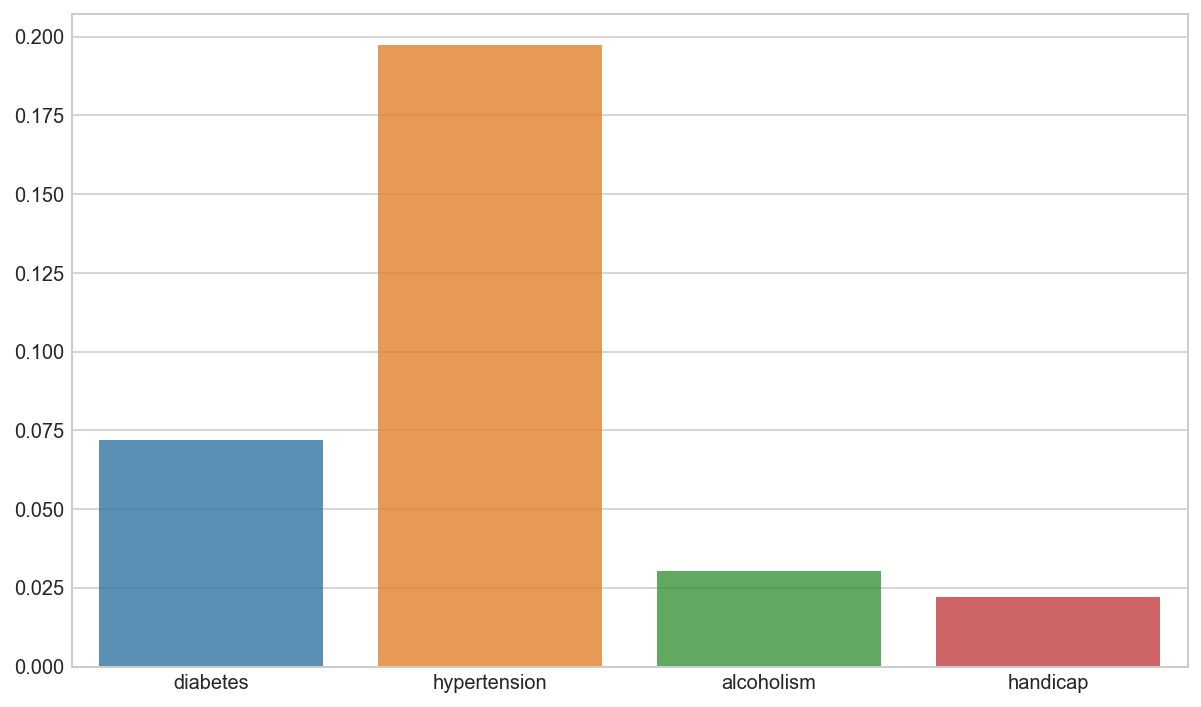

In [34]:
# Calculate the ratio of patients suffering from different kinds of diseases and plot

diab = df['diabetes'].sum()/df['diabetes'].count()
hype = df['hypertension'].sum()/df['hypertension'].count()
alco = df['alcoholism'].sum()/df['alcoholism'].count()
hand = df['handicap'].sum()/df['handicap'].count()


x = ['diabetes', 'hypertension', 'alcoholism', 'handicap']
y = [diab, hype, alco, hand]

plt.subplots(figsize=(10,6))
sns.barplot(x,y, alpha = 0.8);



<a id='q9'></a>
### Research Question 9: What is the ratio of both male and female patients suffering from different kinds of diseases, respectively?


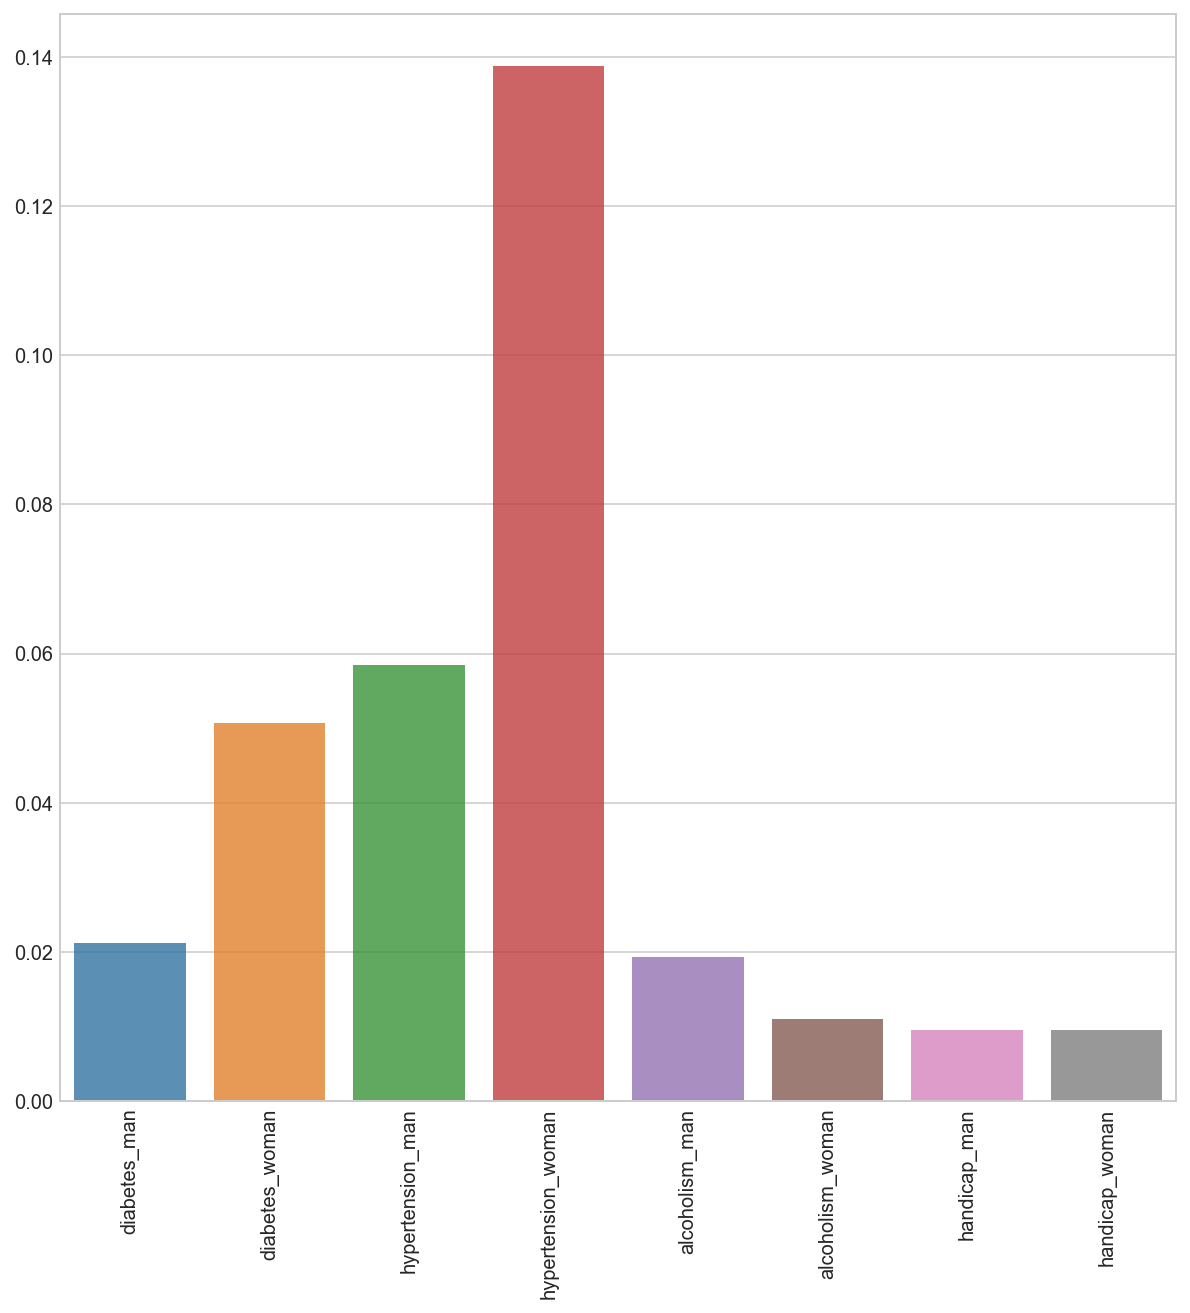

In [35]:
# Seperate male and famele group by query function
# Calculate the ratio of each disease and plot

man = df.query('gender == "M"')
woman = df.query('gender == "F"')

dia_man = man['diabetes'].sum()/df['diabetes'].count()
dia_woman = woman['diabetes'].sum()/df['diabetes'].count()

hype_man = man['hypertension'].sum()/df['hypertension'].count()
hype_woman = woman['hypertension'].sum()/df['hypertension'].count()

alco_man = man['alcoholism'].sum()/df['alcoholism'].count()
alco_woman = woman['alcoholism'].sum()/df['alcoholism'].count()

hand_man = man['handicap'].sum()/df['handicap'].count()
hand_woman = man['handicap'].sum()/df['handicap'].count()

x1 = ['diabetes_man', 'diabetes_woman', 'hypertension_man', 'hypertension_woman',\
      'alcoholism_man', 'alcoholism_woman',\
      'handicap_man', 'handicap_woman']

y1 = [dia_man, dia_woman, hype_man, hype_woman,\
      alco_man, alco_woman, hand_man, hand_woman]


plt.subplots(figsize=(10,10))
plt.xticks(rotation=90);
sns.barplot(x1,y1, alpha = 0.8);

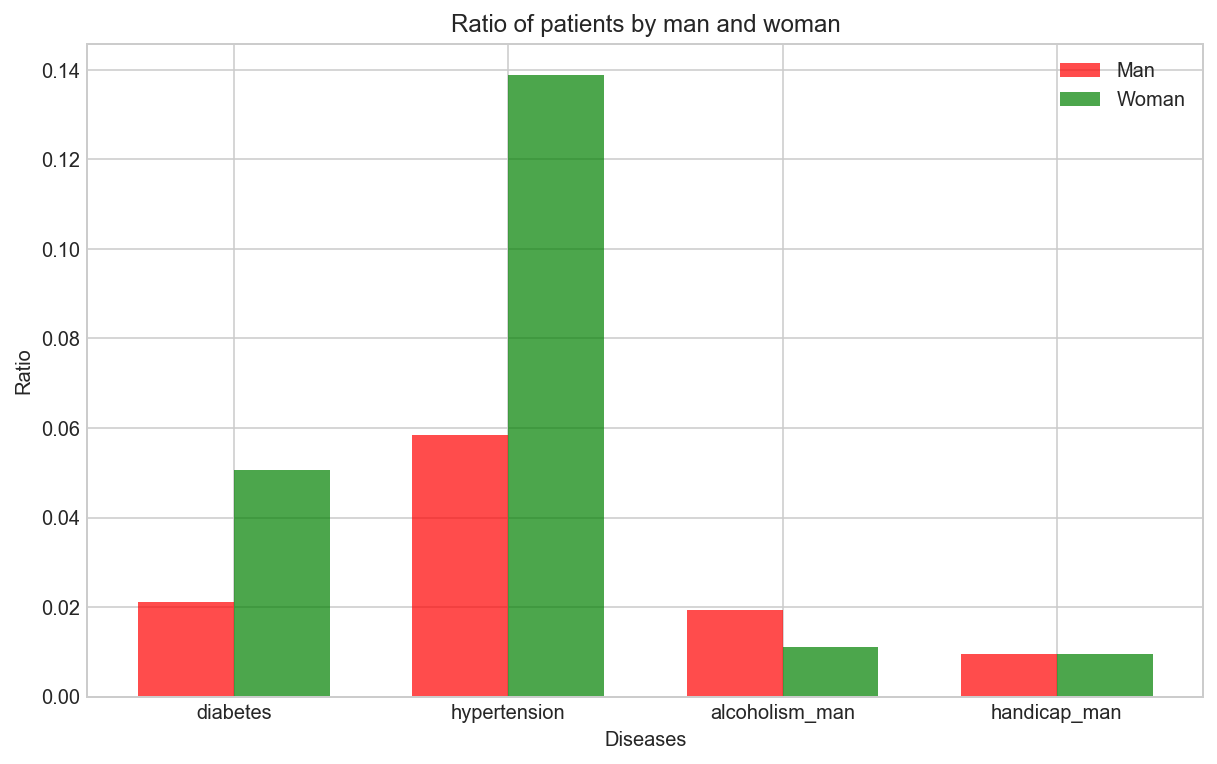

In [36]:
# plot bars

x2 = [dia_man, hype_man, alco_man, hand_man]
y2 = [dia_woman, hype_woman, alco_woman, hand_woman]

ind = np.arange(len(x2))
width = 0.35

plt.figure(figsize=(10,6))
man_chart = plt.bar(ind, x2, width, color='r', alpha=.7, label='Man')
woman_chart = plt.bar(ind + width, y2, width, color='g', alpha=.7, label='Woman')

# title and labels
plt.ylabel('Ratio')
plt.xlabel('Diseases')
plt.title('Ratio of patients by man and woman')
locations = ind + width / 2  # xtick locations
labels = ['diabetes', 'hypertension', 'alcoholism_man', 'handicap_man']  # xtick labels
plt.xticks(locations, labels)
#plt.subplots(figsize=(20, 10))
#plt.xticks(rotation=90);

# legend
plt.legend();
plt.show()

<a id='q10'></a>
### Research Question 10:  Bwtween 16: 00  and 17: 00pm, how many patients's appointments were scheduled on daily bases?

In [37]:
# Use query to locate the group which was scheduled between 16: 00  and 17: 00 pm and find out how many patients
# in total

patients_1617 = df.query('scheduled_day.dt.hour.values >= 16 & scheduled_day.dt.hour.values < 17')
tot_pat = patients_1617.count().tolist()
tot_pat

[5542,
 5542,
 5542,
 5542,
 5542,
 5542,
 5542,
 5542,
 5542,
 5542,
 5542,
 5542,
 5542,
 5542]

In [38]:
# Find out how many days this group cross

patients_1617['mnth_yr'] = patients_1617['scheduled_day'].apply(lambda x: x.strftime('%d-%B-%Y'))
patients_1617['mnth_yr'].nunique()

/Users/shilinli/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


78

In [39]:
# Calculate the average number on daily basis

avg_num = tot_pat[0]/patients_1617['mnth_yr'].nunique()

print('The number of patients whose appointments were scheduled between 16:00 and \
17:00 was {:.2f} on daily basis.'.format(avg_num))

The number of patients whose appointments were scheduled between 16:00 and 17:00 was 71.05 on daily basis.


<a id='q11'></a>
### Research Question 11: What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [40]:
# Calculate the relationship of neighbourhood and show up

df1= df.copy()
df1['no_show'].replace(['Yes'], 0, inplace = True)
df1['no_show'].replace(['No'], 1, inplace = True)
nbr_show = df1.groupby(['neighbourhood'])['no_show'].sum()/df1.groupby(['neighbourhood'])['no_show'].count()


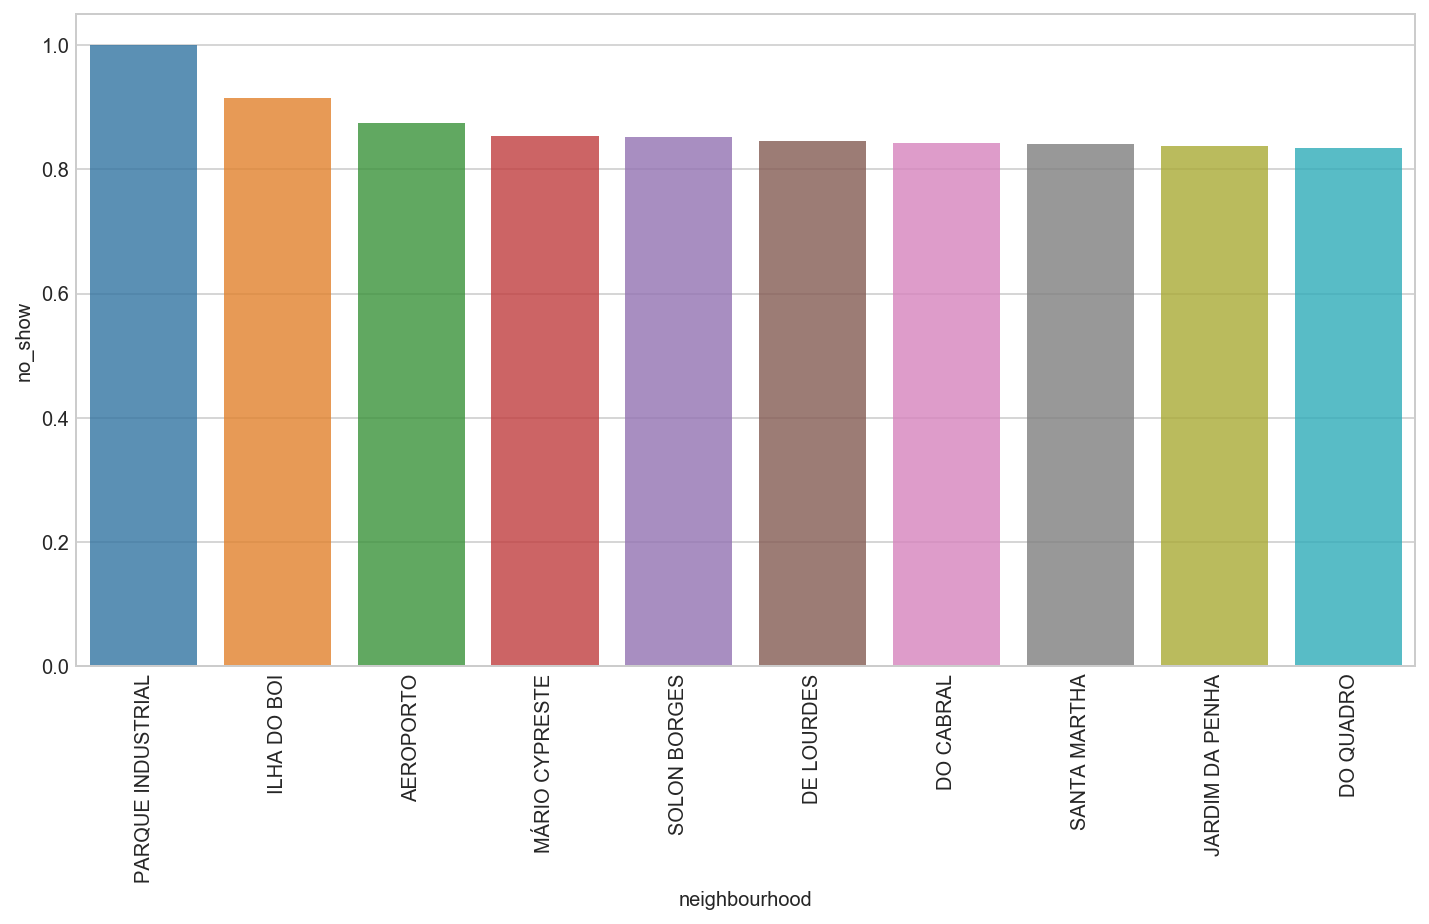

In [41]:
# Select the top 10 for plot

nbr_show = nbr_show.nlargest(n = 10)

plt.subplots(figsize=(12,6))
plt.xticks(rotation=90)
sns.barplot(nbr_show.index, nbr_show, alpha = 0.8);


> The neighbourhood actually had impact on showup, histogram indicated that patients from 'PARQUE INDUSTRIAL' area made 100% show up, much higher even compared to second highest show up ratio (around 85%) which is from ILHADO BOI area. The show up ratio from 2nd high to 10th high are not quite different, ranging from 80% to 85%.

In [42]:
# Seperate man and woman
# Calculate the relationship of neighbourhood and show up

man_part = df1.query('gender == "M"')
woman_part = df1.query('gender == "F"')
man_show = man_part.groupby(['gender'])['no_show'].sum()/man_part.groupby(['gender'])['no_show'].count()
woman_show = woman_part.groupby(['gender'])['no_show'].sum()/woman_part.groupby(['gender'])['no_show'].count()

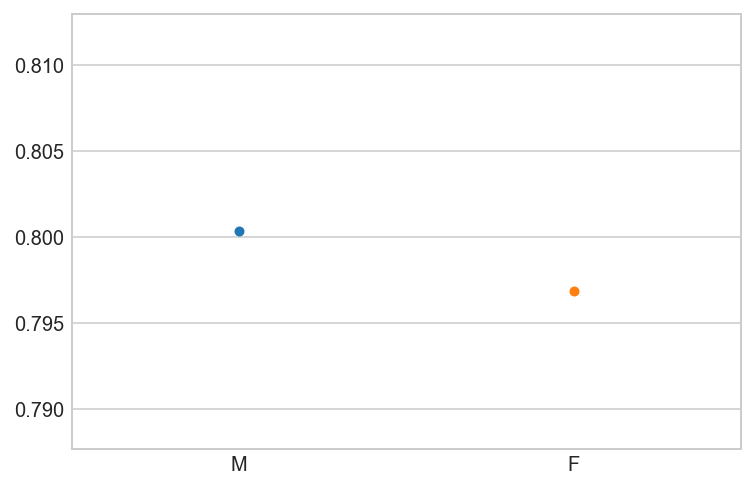

In [43]:
# Plot

x_gender = ['M', 'F']
y_gender =[man_show.tolist()[0], woman_show.tolist()[0]]
#plt.subplots(figsize=(12,6))
#sns.barplot(x_gender, y_gender, alpha = 0.8);
sns.swarmplot(x=x_gender, y=y_gender);


> The gender has almost no impact on show up as indicated by histogram, both genders manifest aournd 80% attendance.

In [44]:
# Drop seconds, mintutes, hours and days as those ranges are too narrow

df1['scheduled_day'] = df1['scheduled_day'].map(lambda x: x.strftime('%Y-%m'))


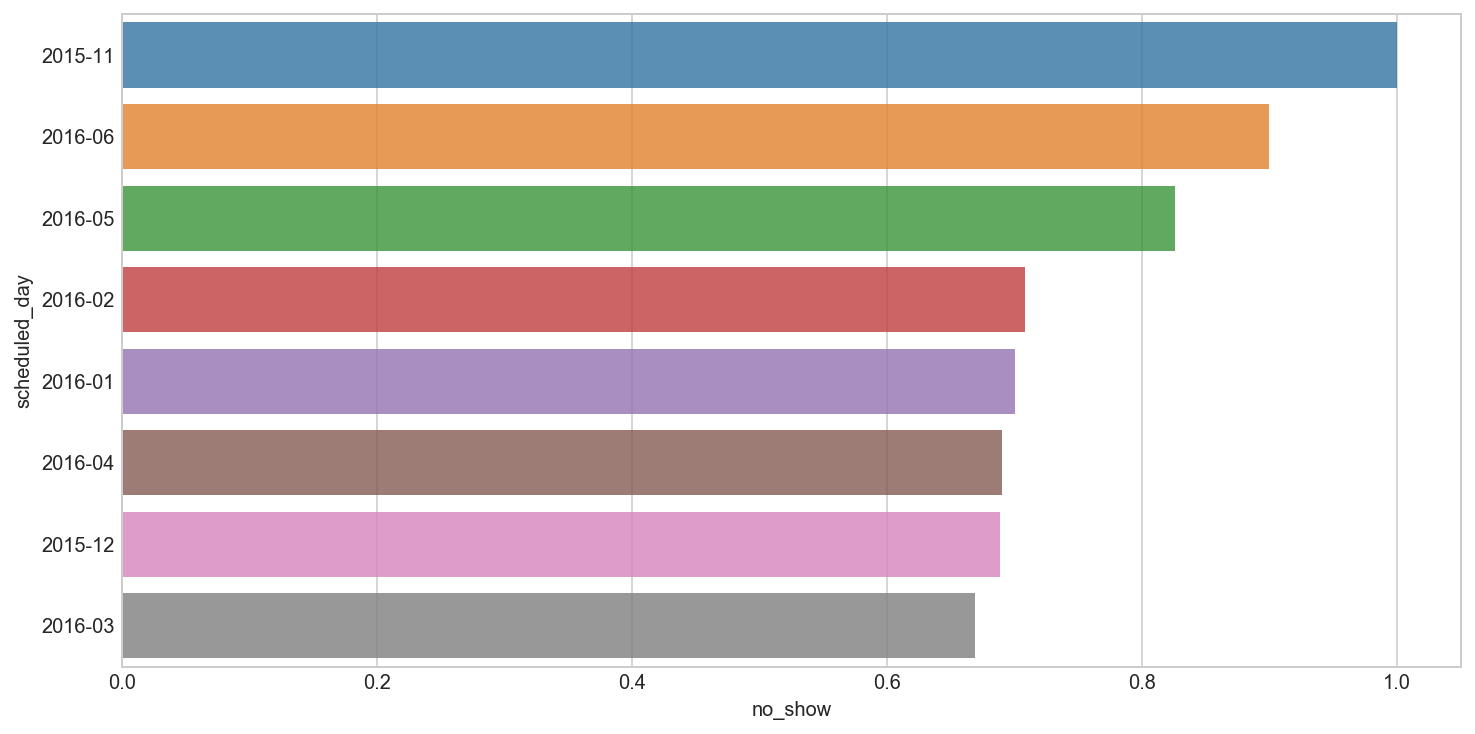

In [45]:
# Calculate the relationship of scheduled_day and show up
# Plot the top 10

sday_show = df1.groupby(['scheduled_day'])['no_show'].sum()/df1.groupby(['scheduled_day'])['no_show'].count()
sday_show = sday_show.nlargest(n = 10)
plt.subplots(figsize=(12,6))
sns.barplot(sday_show, sday_show.index, alpha = 0.8);

> The scheduled_day has important impact on show up as indicated by histogram, with November in 2005 the highest ratio which is 100%.

In [46]:
# Calculate the relationship of appointment_day and show up
# Drop seconds, mintutes, hours and days as those ranges are too narrow

df1['appointment_day'] = df1['appointment_day'].map(lambda x: x.strftime('%Y-%m'))

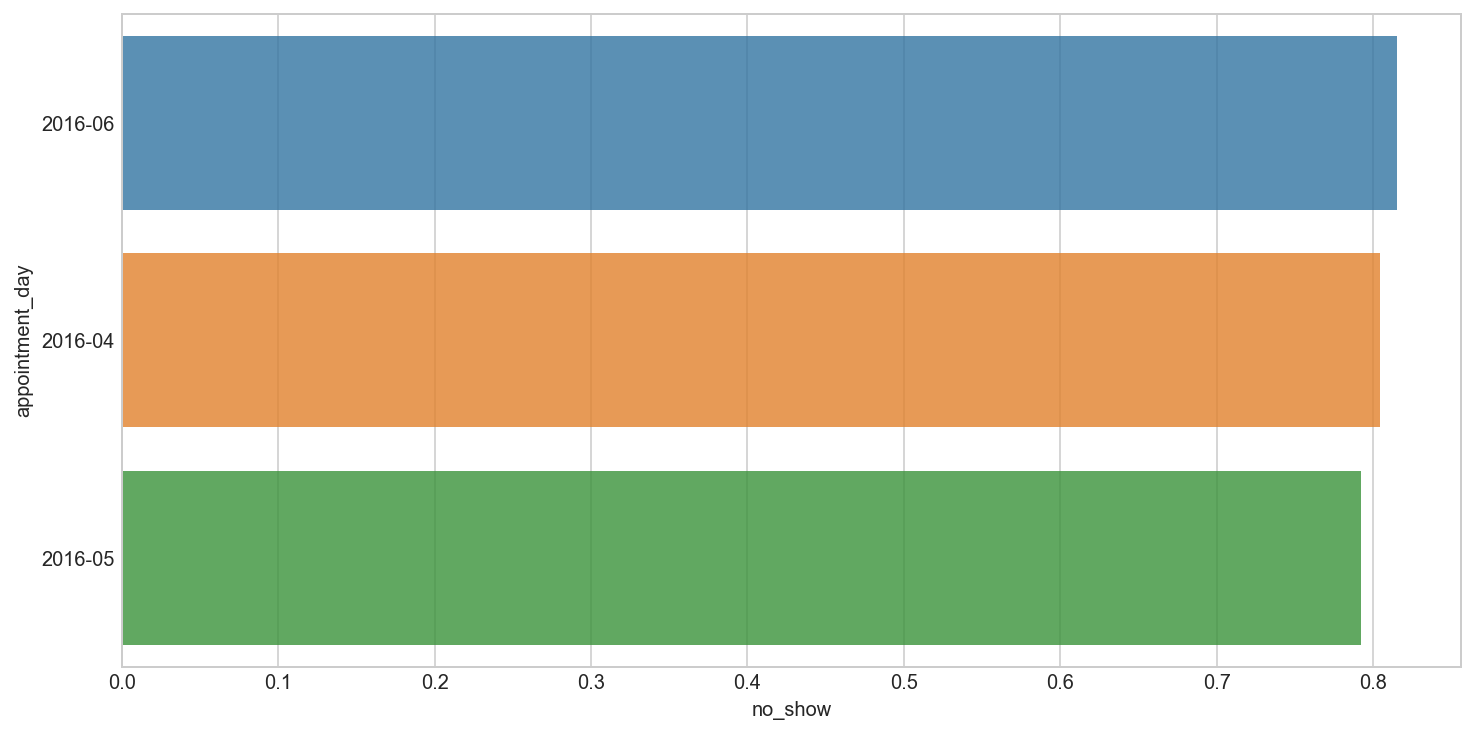

In [47]:
# Plot the top 10

aday_show = df1.groupby(['appointment_day'])['no_show'].sum()/df1.groupby(['appointment_day'])['no_show'].count()
aday_show = aday_show.nlargest(n = 10)
plt.subplots(figsize=(12,6))
sns.barplot(aday_show, aday_show.index, alpha = 0.8);

> The appointment_day has little important impact on show up as indicated by histogram.

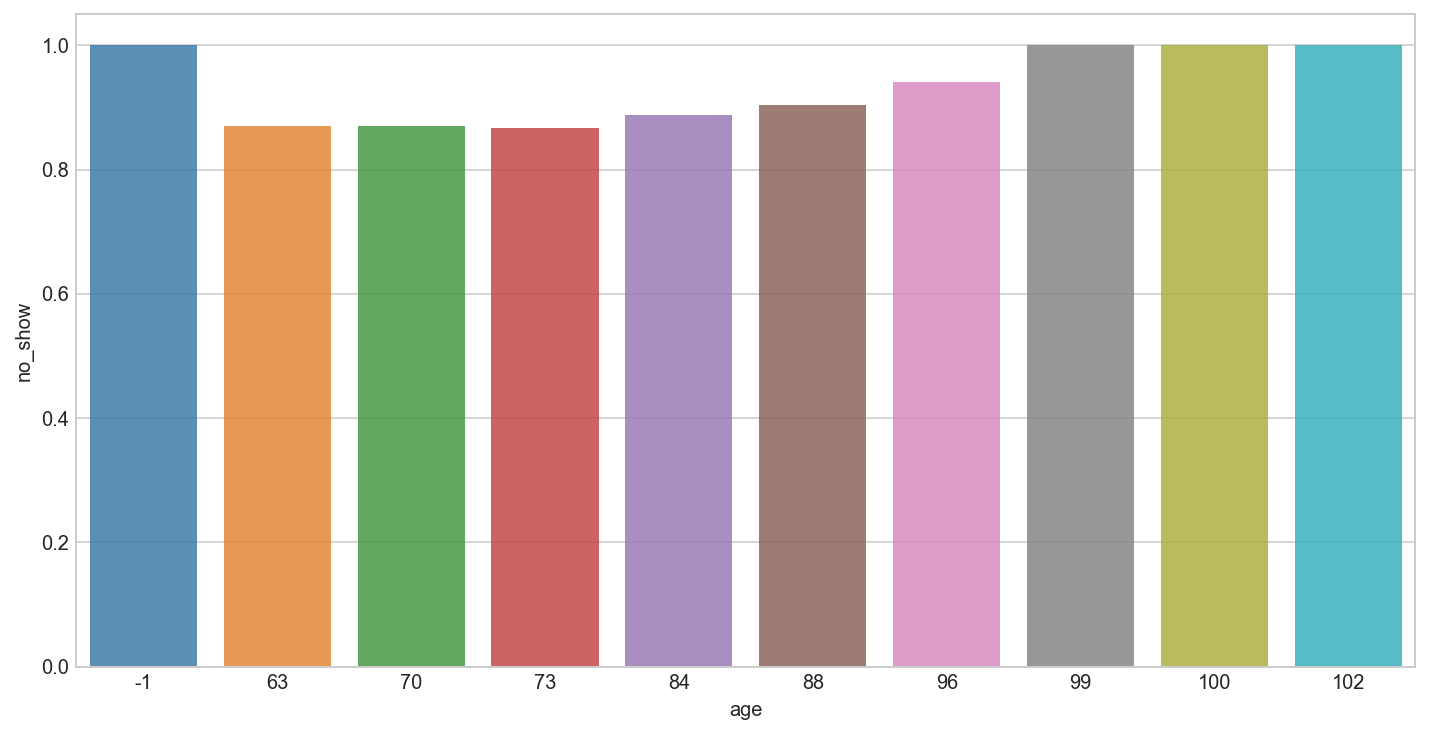

In [48]:
# Plot the relationship for age and show up

age_show = df1.groupby(['age'])['no_show'].sum()/df1.groupby(['age'])['no_show'].count()
age_show = age_show.nlargest(n = 10)
plt.subplots(figsize=(12,6))
sns.barplot(age_show.index, age_show, alpha = 0.8);


> Age also seems has little impact on on show up as indicated by histogram, however, there is one group which is -1 year, which might be wrong data.

In [49]:
# Find the rows whose age == 1

df1.query('age == -1')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
99832,4.659432e+14,5775010,F,2016-06,2016-06,-1,ROMÃO,0,0,0,0,0,0,1


In [50]:
# As there is only one row of such error, we can simply delete it without affeting the previous and later on analysis

df1.drop(df.index[[99832]], inplace = True)

# Comfirm changes

df1.iloc[99832]


patient_id            2.89827e+13
appointment_id            5774075
gender                          M
scheduled_day             2016-06
appointment_day           2016-06
age                             1
neighbourhood      FORTE SÃO JOÃO
scholarship                     0
hypertension                    0
diabetes                        0
alcoholism                      0
handicap                        0
sms_received                    0
no_show                         1
Name: 99833, dtype: object

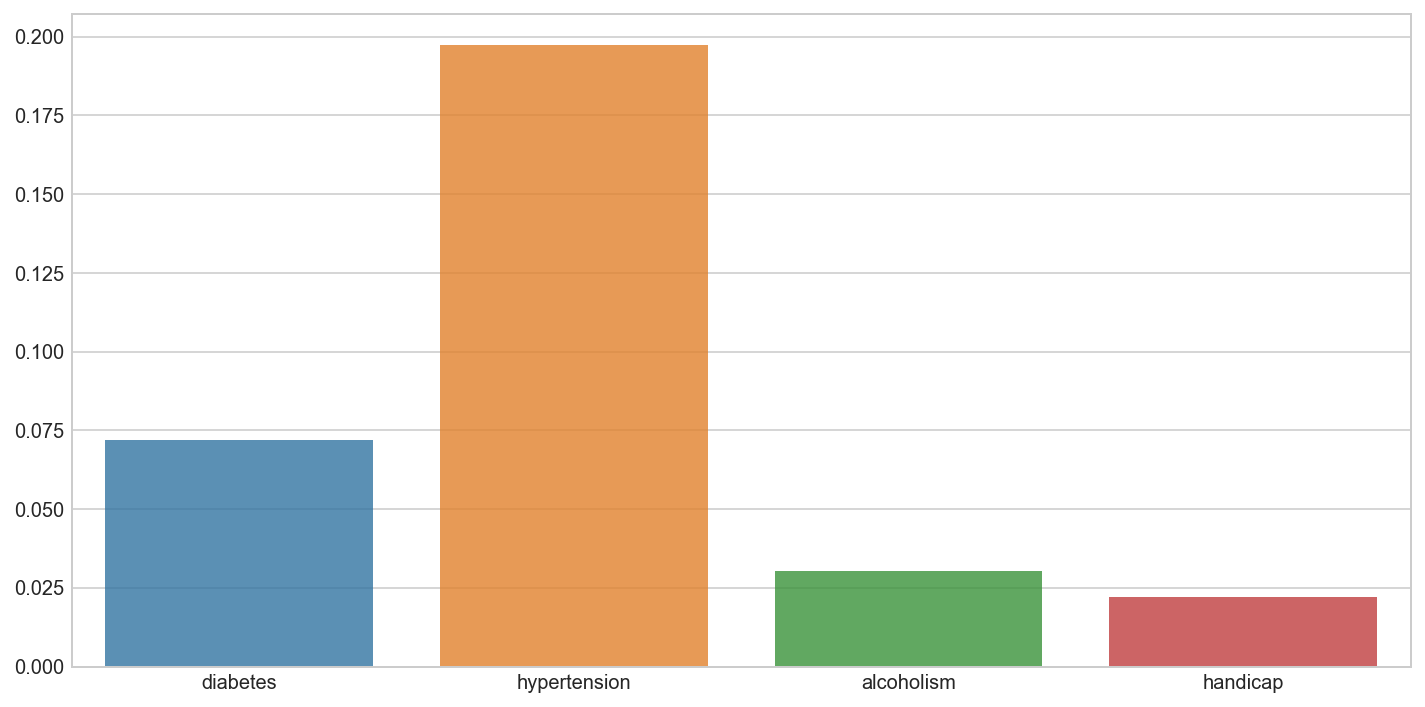

In [51]:
# Find out the relationship of the 4 kinds of disease and show up


hyp_show = df1.groupby(['hypertension'])['no_show'].sum()/df1.groupby(['hypertension'])['no_show'].count()
dia_show = df1.groupby(['diabetes'])['no_show'].sum()/df1.groupby(['diabetes'])['no_show'].count()
alc_show = df1.groupby(['alcoholism'])['no_show'].sum()/df1.groupby(['alcoholism'])['no_show'].count()
han_show = df1.groupby(['handicap'])['no_show'].sum()/df1.groupby(['handicap'])['no_show'].count()

x_diseases = ['hypertension', 'diabetes', 'alcoholism', 'handicap']
y_diseases = [hyp_show.tolist()[0], dia_show.tolist()[0], \
              alc_show.tolist()[0], han_show.tolist()[0]]

plt.subplots(figsize=(12,6))
sns.barplot(x, y, alpha = 0.8);
                        

> The kind of diseases has important impact on show up, with hypertension as the highest ratio at around 20%.

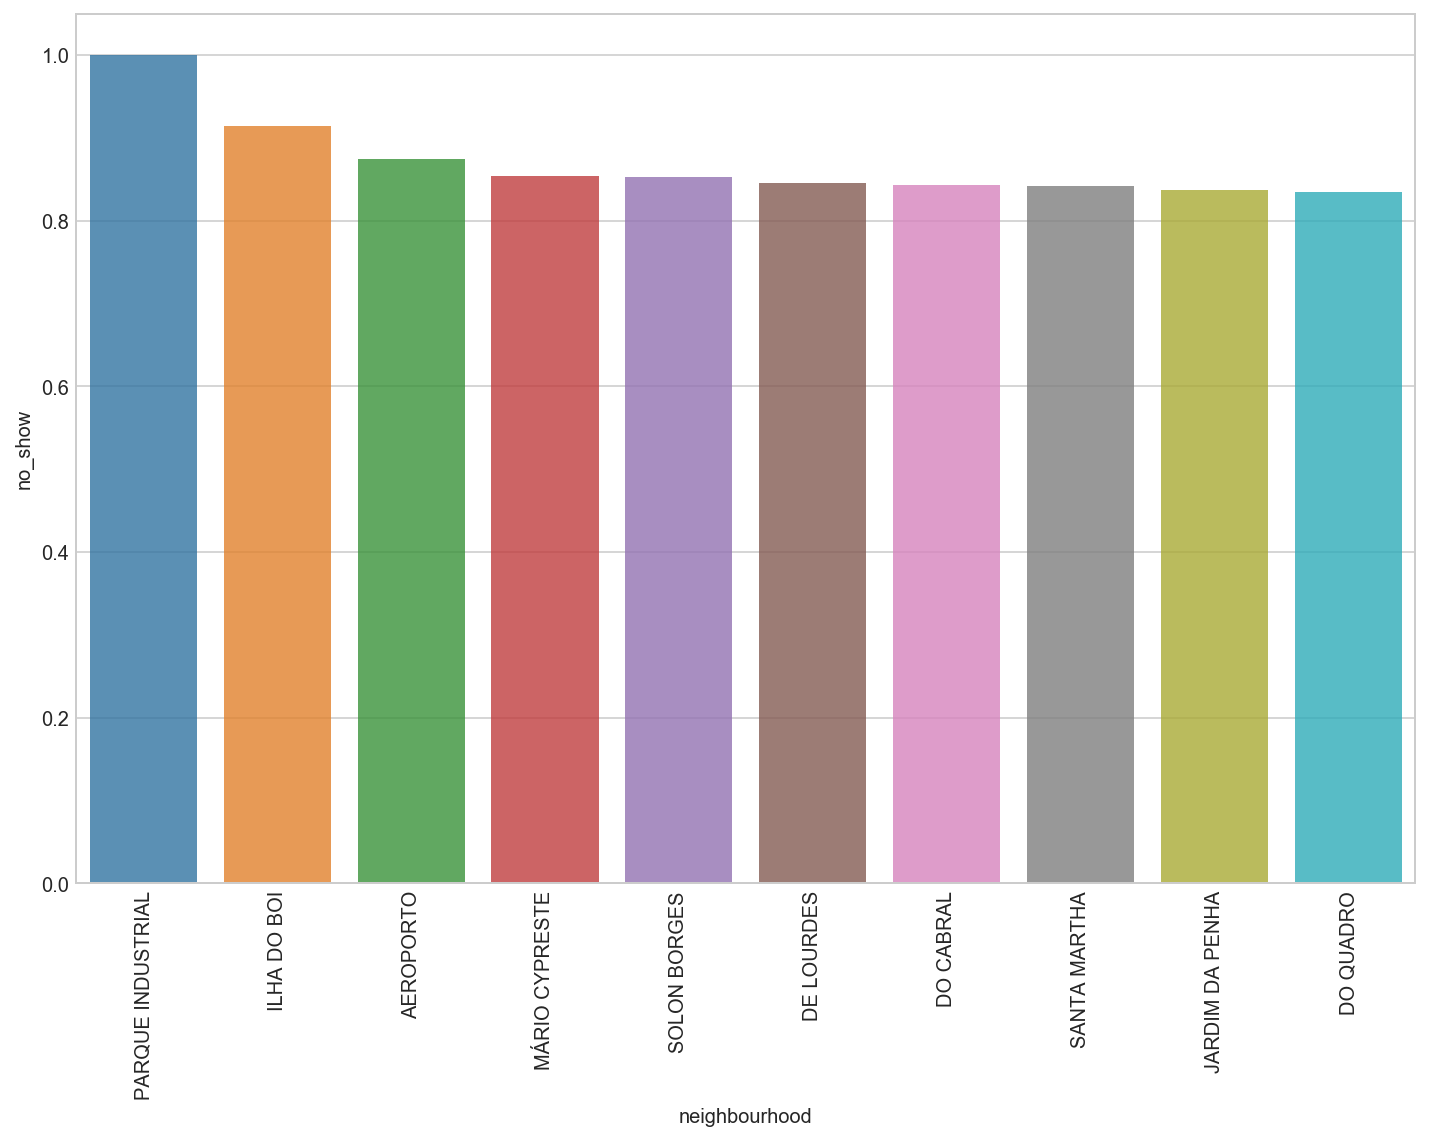

In [52]:
# Calculate the relationship of scholarship and show up

schlar_show = df1.groupby(['neighbourhood'])['no_show'].sum()/df1.groupby(['neighbourhood'])['no_show'].count()
schlar_show = schlar_show.nlargest(n = 10)
plt.subplots(figsize=(12,8))
sns.barplot(schlar_show.index, schlar_show, alpha = 0.8);
plt.xticks(rotation=90);


> The scholarship has important impact on show up, with 'PARQUE INDUSTRIAL' as the highest ratio at 100%.

<a id='conclusions'></a>
## Conclusions
> In current study, a good amount of profound analysis has been carried out. 
Prior to each step, deailed instructions was given and interpretions was also provided afterwards. 
The dataset included 110527 pieces of patients's information from only 2016, 
which is substantial but limited to only one year. Therefore, even based on such large amount of data, the analysis would not be very representative. 

> The good aspect of current study was it didn't include NaN values nor duplicates, which could affect the process 
of analysis. 



In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_No-show appointments_Dataset.ipynb'])

0